<a href="https://colab.research.google.com/github/shmilyface/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/Copy_of_Copy_of_Copy_of_LS_DS_131_Statistics_Probability_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 1 Sprint 3 Assignment 1*

# Apply the t-test to real data

Your assignment is to determine which issues have "statistically significant" differences between political parties in this [1980s congressional voting data](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records). The data consists of 435 instances (one for each congressperson), a class (democrat or republican), and 16 binary attributes (yes or no for voting for or against certain issues). Be aware - there are missing values!

Your goals:

1. Load and clean the data (or determine the best method to drop observations when running tests)
2. Using hypothesis testing, find an issue that democrats support more than republicans with p < 0.01
3. Using hypothesis testing, find an issue that republicans support more than democrats with p < 0.01
4. Using hypothesis testing, find an issue where the difference between republicans and democrats has p > 0.1 (i.e. there may not be much of a difference)

Note that this data will involve *2 sample* t-tests, because you're comparing averages across two groups (republicans and democrats) rather than a single group against a null hypothesis.

Stretch goals:

1. Refactor your code into functions so it's easy to rerun with arbitrary variables
2. Apply hypothesis testing to your personal project data (for the purposes of this notebook you can type a summary of the hypothesis you formed and tested)

In [0]:
### YOUR CODE STARTS HERE

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random as random

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data', header=None)
df.columns =['party',
         'handicap_infant',
         'water_cost_share',
         'budget_res_adoption',
         'dr_fee_freeze',
         'el_salvador_aid',
         'schools_religious_groups',
         'anti_satellite_ban',
         'nicaraguan_aid',
         'missile',
         'immigration',
         'fuel_corp_cutback',
         'edu_spending',
         'superfund_sue',
         'crime',
         'exports',
         'south_africa_export_admin']
df['handicap_infant'].value_counts()


n    236
y    187
?     12
Name: handicap_infant, dtype: int64

In [0]:
'''
adjust columns (header=none)
add column names
deal with null values in a way that doesn't hurt the data
(probably unknown is best)
run a pair plot
test hypotheses of issues

'''
df.head()


,party,handicap_infant,water_cost_share,budget_res_adoption,dr_fee_freeze,el_salvador_aid,schools_religious_groups,anti_satellite_ban,nicaraguan_aid,missile,immigration,fuel_corp_cutback,edu_spending,superfund_sue,crime,exports,south_africa_export_admin
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [0]:
df = df.replace(['n', 'y', '?'],[-1,1,0])
df.head()

,party,handicap_infant,water_cost_share,budget_res_adoption,dr_fee_freeze,el_salvador_aid,schools_religious_groups,anti_satellite_ban,nicaraguan_aid,missile,immigration,fuel_corp_cutback,edu_spending,superfund_sue,crime,exports,south_africa_export_admin
0,republican,-1,1,-1,1,1,1,-1,-1,-1,1,0,1,1,1,-1,1
1,republican,-1,1,-1,1,1,1,-1,-1,-1,-1,-1,1,1,1,-1,0
2,democrat,0,1,1,0,1,1,-1,-1,-1,-1,1,-1,1,1,-1,-1
3,democrat,-1,1,1,-1,0,1,-1,-1,-1,-1,1,-1,1,-1,-1,1
4,democrat,1,1,1,-1,1,1,-1,-1,-1,-1,1,0,1,1,1,1


In [0]:
df['handicap_infant'].describe()

df.dtypes

party                        object
handicap_infant               int64
water_cost_share              int64
budget_res_adoption           int64
dr_fee_freeze                 int64
el_salvador_aid               int64
schools_religious_groups      int64
anti_satellite_ban            int64
nicaraguan_aid                int64
missile                       int64
immigration                   int64
fuel_corp_cutback             int64
edu_spending                  int64
superfund_sue                 int64
crime                         int64
exports                       int64
south_africa_export_admin     int64
dtype: object

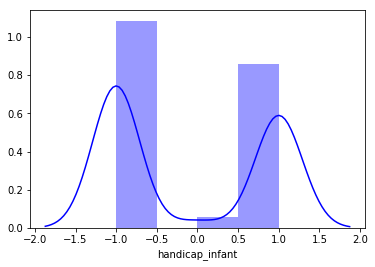

In [0]:
ax=sns.distplot
ax(df['handicap_infant'], color='b')




In [0]:
democrat = df[df['party'] == 'democrat']
democrat = democrat.drop(['party'], axis=1)

republican = df[df['party'] == 'republican']
republican = republican.drop(['party'], axis=1)
democrat.head()


,handicap_infant,water_cost_share,budget_res_adoption,dr_fee_freeze,el_salvador_aid,schools_religious_groups,anti_satellite_ban,nicaraguan_aid,missile,immigration,fuel_corp_cutback,edu_spending,superfund_sue,crime,exports,south_africa_export_admin
2,0,1,1,0,1,1,-1,-1,-1,-1,1,-1,1,1,-1,-1
3,-1,1,1,-1,0,1,-1,-1,-1,-1,1,-1,1,-1,-1,1
4,1,1,1,-1,1,1,-1,-1,-1,-1,1,0,1,1,1,1
5,-1,1,1,-1,1,1,-1,-1,-1,-1,-1,-1,1,1,1,1
6,-1,1,-1,1,1,1,-1,-1,-1,-1,-1,-1,0,1,1,1


In [0]:
republican.head()

,handicap_infant,water_cost_share,budget_res_adoption,dr_fee_freeze,el_salvador_aid,schools_religious_groups,anti_satellite_ban,nicaraguan_aid,missile,immigration,fuel_corp_cutback,edu_spending,superfund_sue,crime,exports,south_africa_export_admin
0,-1,1,-1,1,1,1,-1,-1,-1,1,0,1,1,1,-1,1
1,-1,1,-1,1,1,1,-1,-1,-1,-1,-1,1,1,1,-1,0
7,-1,1,-1,1,1,1,-1,-1,-1,-1,-1,-1,1,1,0,1
8,-1,1,-1,1,1,1,-1,-1,-1,-1,-1,1,1,1,-1,1
10,-1,1,-1,1,1,-1,-1,-1,-1,-1,0,0,1,1,-1,-1


In [0]:
dem_sam= democrat.sample(n=20)
rep_sam = republican.sample(n=20)

In [0]:
dem_sam.shape

(20, 16)

In [0]:
print("The sample DF1 Mean:\n\n", dem_sam.mean())
print("\nThe sample DF1 STD:\n\n", dem_sam.std())
print("\nThe sample DF1 VAR:\n\n", dem_sam.var())

The sample DF1 Mean:

 handicap_infant              0.15
water_cost_share             0.25
budget_res_adoption          0.80
dr_fee_freeze               -0.85
el_salvador_aid             -0.65
schools_religious_groups     0.05
anti_satellite_ban           0.50
nicaraguan_aid               0.70
missile                      0.25
immigration                  0.00
fuel_corp_cutback            0.05
edu_spending                -0.50
superfund_sue               -0.25
crime                       -0.35
exports                      0.45
south_africa_export_admin    0.60
dtype: float64

The sample DF1 STD:

 handicap_infant              0.988087
water_cost_share             0.910465
budget_res_adoption          0.615587
dr_fee_freeze                0.489360
el_salvador_aid              0.745160
schools_religious_groups     0.998683
anti_satellite_ban           0.827170
nicaraguan_aid               0.732695
missile                      0.910465
immigration                  1.025978
fuel_corp_cutba

##T Tests

In [0]:
from scipy.stats import ttest_ind, ttest_ind_from_stats, ttest_rel

#def dr_ttest(x,y):
  #ttest_ind(dem_sam[x], rep_sam[y])
  #print(dr_ttest(x,y))

#handicap_infant
handicap_infant = ttest_ind(dem_sam['handicap_infant'], rep_sam['handicap_infant'])
f'{handicap_infant.pvalue:.20%}'

#pvalue is higher than .05%, failed to reject null hypotheses. Means are highly likely to be the same. 

'0.07867807887549493895%'

In [0]:
def showTotes(k):
  print("Democrat:\n", democrat[k].value_counts())
  print("Republican:\n", republican[k].value_counts())
  
showTotes('handicap_infant')

Democrat:
  1    156
-1    102
 0      9
Name: handicap_infant, dtype: int64
Republican:
 -1    134
 1     31
 0      3
Name: handicap_infant, dtype: int64


###water cost share

In [0]:
#water cost share
water = ttest_ind(dem_sam['water_cost_share'], rep_sam['water_cost_share'])
f'{water.pvalue:.20%}'

#pvalue is higher than .05%, failed to reject null hypotheses. Means are highly likely to be the same. 

'13.47481380387162097634%'

In [0]:
showTotes('water_cost_share')

Democrat:
  1    120
-1    119
 0     28
Name: water_cost_share, dtype: int64
Republican:
  1    75
-1    73
 0    20
Name: water_cost_share, dtype: int64


###Budget Res Adoption

In [0]:
#budget res adoption
budget = ttest_ind(dem_sam['budget_res_adoption'], rep_sam['budget_res_adoption'])
f'{budget.pvalue:.20%}'

#pvalue is lower than .05%, reject null hypothesis. Means are highly likely to be different

In [0]:
showTotes('budget_res_adoption')

Democrat:
  1    231
-1     29
 0      7
Name: budget_res_adoption, dtype: int64
Republican:
 -1    142
 1     22
 0      4
Name: budget_res_adoption, dtype: int64


###Dr Fee Freeze

In [0]:
#dr fee freeze
dr_freeze = ttest_ind(dem_sam['dr_fee_freeze'], rep_sam['dr_fee_freeze'])
f'{dr_freeze.pvalue:.20%}'

#pvalue is lower than .05%, reject null hypothesis. Means are highly likely to be different

In [0]:
showTotes('dr_fee_freeze')

Democrat:
 -1    245
 1     14
 0      8
Name: dr_fee_freeze, dtype: int64
Republican:
  1    163
 0      3
-1      2
Name: dr_fee_freeze, dtype: int64


###El Salvador Aid Comparison

In [0]:
#el salvador aid comparison
el_salv = ttest_ind(dem_sam['el_salvador_aid'], rep_sam['el_salvador_aid'])
f'{el_salv.pvalue:.20%}'

#pvalue is lower than .05%, reject null hypothesis. Means are highly likely to be different

In [0]:
showTotes('el_salvador_aid')

Democrat:
 -1    200
 1     55
 0     12
Name: el_salvador_aid, dtype: int64
Republican:
  1    157
-1      8
 0      3
Name: el_salvador_aid, dtype: int64


###School Religious Groups

In [0]:
#school religious groups
school_church = ttest_ind(dem_sam['schools_religious_groups'], rep_sam['schools_religious_groups'])
f'{school_church.pvalue:.20%}'

#pvalue is lower than .05%, reject null hypothesis. Means are highly likely to be different

In [0]:
showTotes('schools_religious_groups')

Democrat:
 -1    135
 1    123
 0      9
Name: schools_religious_groups, dtype: int64
Republican:
  1    149
-1     17
 0      2
Name: schools_religious_groups, dtype: int64


###Anti Satellite Ban

In [0]:
#anti satellite ban
asb = ttest_ind(dem_sam['anti_satellite_ban'], rep_sam['anti_satellite_ban'])
f'{asb.pvalue:.20%}'

#pvalue is lower than .05%, reject null hypothesis. Means are highly likely to be different

In [0]:
showTotes('anti_satellite_ban')

Democrat:
  1    200
-1     59
 0      8
Name: anti_satellite_ban, dtype: int64
Republican:
 -1    123
 1     39
 0      6
Name: anti_satellite_ban, dtype: int64


###Nicaraguan Aid

In [0]:
#nicaraguan aid
nic_aid = ttest_ind(dem_sam['nicaraguan_aid'], rep_sam['nicaraguan_aid'])
f'{nic_aid.pvalue:.20%}'

#pvalue is lower than .05%, reject null hypothesis. Means are highly likely to be different

In [0]:
showTotes('nicaraguan_aid')

Democrat:
  1    218
-1     45
 0      4
Name: nicaraguan_aid, dtype: int64
Republican:
 -1    133
 1     24
 0     11
Name: nicaraguan_aid, dtype: int64


###Fire Ze Missiles

In [0]:
#missile
fire_ze_missiles = ttest_ind(dem_sam['missile'], rep_sam['missile'])
f'{fire_ze_missiles.pvalue:.20%}'

#pvalue is lower than .05%, reject null hypothesis. Means are highly likely to be different

In [0]:
showTotes('missile')

Democrat:
  1    188
-1     60
 0     19
Name: missile, dtype: int64
Republican:
 -1    146
 1     19
 0      3
Name: missile, dtype: int64


###Immigration

In [0]:
#immigration
gatekeeping = ttest_ind(dem_sam['immigration'], rep_sam['immigration'])
f'{gatekeeping.pvalue:.20%}'

#pvalue is higher than .05%, failed to reject null hypotheses. Means are highly likely to be the same. 

In [0]:
showTotes('immigration')

Democrat:
 -1    139
 1    124
 0      4
Name: immigration, dtype: int64
Republican:
  1    92
-1    73
 0     3
Name: immigration, dtype: int64


###Fuel Corp Cutback

In [0]:
#fuel corp cutback
fuel = ttest_ind(dem_sam['fuel_corp_cutback'], rep_sam['fuel_corp_cutback'])
f'{fuel.pvalue:.20%}'

#pvalue is higher than .05%, failed to reject null hypotheses. Means are highly likely to be the same. 

In [0]:
showTotes('fuel_corp_cutback')

Democrat:
  1    129
-1    126
 0     12
Name: fuel_corp_cutback, dtype: int64
Republican:
 -1    138
 1     21
 0      9
Name: fuel_corp_cutback, dtype: int64


###Edu Spending

In [0]:
#edu spending
edu_spend = ttest_ind(dem_sam['edu_spending'], rep_sam['edu_spending'])
f'{edu_spend.pvalue:.20%}'

#pvalue is lower than .05%, reject null hypothesis. Means are highly likely to be different

In [0]:
showTotes('edu_spending')

Democrat:
 -1    213
 1     36
 0     18
Name: edu_spending, dtype: int64
Republican:
  1    135
-1     20
 0     13
Name: edu_spending, dtype: int64


###Superfund Sue

In [0]:
#superfund sue
supersue = ttest_ind(dem_sam['superfund_sue'], rep_sam['superfund_sue'])
f'{supersue.pvalue:.20%}'

#pvalue is lower than .05%, reject null hypothesis. Means are highly likely to be different

In [0]:
showTotes('superfund_sue')

Democrat:
 -1    179
 1     73
 0     15
Name: superfund_sue, dtype: int64
Republican:
  1    136
-1     22
 0     10
Name: superfund_sue, dtype: int64


###Crime

In [0]:
#crime
criminy = ttest_ind(dem_sam['crime'], rep_sam['crime'])
f'{criminy.pvalue:.20%}'

#pvalue is lower than .05%, reject null hypothesis. Means are highly likely to be different

In [0]:
showTotes('crime')

Democrat:
 -1    167
 1     90
 0     10
Name: crime, dtype: int64
Republican:
  1    158
 0      7
-1      3
Name: crime, dtype: int64


###Exports

In [0]:
#exports
ex_ports = ttest_ind(dem_sam['exports'], rep_sam['exports'])
f'{ex_ports.pvalue:.20%}'

#pvalue is lower than .05%, reject null hypothesis. Means are highly likely to be different

In [0]:
showTotes('exports')

Democrat:
  1    160
-1     91
 0     16
Name: exports, dtype: int64
Republican:
 -1    142
 1     14
 0     12
Name: exports, dtype: int64


###South African Export Admin

In [0]:
#south african export admin
saea = ttest_ind(dem_sam['south_africa_export_admin'], rep_sam['south_africa_export_admin'])
f'{saea.pvalue:.20%}'

#pvalue is higher than .05%, failed to reject null hypotheses. Means are highly likely to be the same. 

In [0]:
showTotes('south_africa_export_admin')

Democrat:
  1    173
 0     82
-1     12
Name: south_africa_export_admin, dtype: int64
Republican:
  1    96
-1    50
 0    22
Name: south_africa_export_admin, dtype: int64


#Conclusions: 

##Democrats supported more than Republicans w/ P-Value: < .01



*   Budget Res Adoption:  .00001%


##Republicans supported more than Democrats w/ P-Value: < .01

* Dr Fee Freeze : .000000002%

##Difference between Dem and Rep with p-value > .01

* Water Cost Share: 41.6%









---



**Challenge**

Write Python functions to calculate both the number of combinations and the number of permutations for given $n$ and $k$ (yes, these functions definitely exist out there - code your own, and compare!).

In [0]:
#only need n since we define fact in the function
#factorial will always be 1
def combo_attack(n):
  fact = 1
#i stands for whatever the current value in the range is right now
  for i in range(1, n+1):
    fact = fact*i
  return fact

#premutation test
def numb_perm(n,k):
  #n!/k!(n-k)!
  numb = combo_attack(n)/combo_attack(k) * (combo_attack(n-k))
  return numb

print(numb_perm(9,2))

**Challenge**


Using scipy.stats.ttest_1samp, perform a t-test on the above scenario, with the following data as input:

Copy

[0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
 1, 0, 1, 0, 1, 1, 0, 0, 0]

This list represents 50 respondents to the survey, where a 1 indicates preference for Pepsi and a 0 indicates preferences for Coke.

After you perform the test, try to interpret your results - one hint is that, for most statistical tests, a larger test statistic means more “significant” or unusual results.

In [0]:
import scipy.stats

scipy.stats.ttest_1samp([], popmean='array-like')